# Comparison of Techniques for Mapping Streams


### Motivation
In this notebook, we will explore different numerical methods to map solar wind streams from different locations in the heliosphere. Moreover, we will examine the numerical difficulties of each method in an attempt to find the optimal method to capture the wave propagation without adding artificial oscillation or "numerical viscosity".


#### References

[1] Riley, P., and Lionello, R., “Mapping Solar Wind Streams from the Sun to 1 AU: A Comparison of Techniques,”Solar Phys.,Vol. 270, 2011, pp. 575–592. doi:10.1007/s11207-011-9766-x.


[2] Riley, P., and Issan, O., “Using a Heliospheric Upwinding eXtrapolation Technique to Magnetically Connect Different Regions of the Heliosphere,” Frontiers in Physics, Vol. 9, 2021, p. 268.  doi:10.3389/fphy.2021.679497.


[3] Snyder, C. W., and Neugebauer, M., “The relation of Mariner-2 plasma data to solar phenomena,”The Solar Wind, edited by R. J.Mackin and M. Neugebauer, Permanon Press, Oxford, 1966, p. 25.


[4] LeVeque, R. J.,Numerical methods for conservation laws (2. ed.)., Lectures in mathematics, Birkhäuser, 1992.

## The Underlying Partial Differential Equation (PDE)

The solar wind motion can be described as the fluid momentum equation in corotating frame of reference [1,2]:
	
$$
-\Omega_{rot} \frac{\partial v}{\partial \phi} + (v \cdot \nabla)v = \frac{1}{\rho} \nabla P - \frac{G M_{s}}{r^2}e_{r}
$$


where $v$ is the solar wind velocity, $\rho$ is the plasma density, $P$ is the plasma pressure, $G$ is the gravitational constant, $r$ is the radial distance from the Sun, $\phi$ denotes Carrington longitude in Heliographic (rotating) Coordinate System (HG), and $M_{s}$ is the solar mass. By neglecting the pressure gradient and gravity terms, which are assumed to be small in the heliosphere, the fluid momentum equation reduces to a nonlinear scalar homogeneous time-stationary equation, described by 

$$
\frac{\partial v_{r}}{\partial \phi} -\frac{1}{\Omega_{rot}}v_{r}\frac{ \partial v_{r}}{\partial r}=0
$$

The Cauchy problem is defined by the equation above on the domain $ 0 < r < \infty$, $0 \leq \phi \leq 2 \pi$, where $\Omega_{rot}$ is the angular frequency of the Sun's rotation, equal to $\frac{2 \pi}{25.38} \text{ days}$ at the solar equator. The initial condition is
$$
v_{r}(\phi, r_{0}) = v_{r_{0}}(\phi)
$$

where $r$ denotes the radial distance from the Sun,  $\phi$ denotes Carrington longitude in Heliographic (rotating) coordinate system (HG), and $v$ is the solar wind velocity in the radial direction. The initial-boundary value problem, or Cauchy problem with periodic initial data, is defined by the equation above on the domain $ r > 0$, $0 \leq \phi \leq 2 \pi$, where $\Omega_{rot}$ is the angular frequency of the Sun's rotation set equal to $\frac{2 \pi}{25.38} \text{1/days}$ at the solar equator, and more generally is a function of latitude [2].

\begin{equation}
\Omega_{rot} (\theta) = \frac{2\pi}{25.38} - \frac{2.77\pi}{180} \cos(\theta)^2
\end{equation}

The problem is subject to the initial condition
\begin{equation} \label{ic}
v(\phi, r_{0}) = v_{r_{0}}(\phi)
\end{equation}

with periodic boundary conditions, such that $v(0, r) = v(2\pi, r)$ for all radial locations. The PDE would be considered in the form of the famous inviscid Burgers' equation if the propagation was in $\phi$ direction, however, we are advancing in the radial direction; For example, given an initial condition at $30 R\odot$, what is the solar wind speed near Earth at $1\text{AU}\approx 215R_\odot$? 

## First order Upwind Method (HUX-f/b)

The Heliospheric Upwind eXtrapolation Technqiue developed by Riley et al. [1] leverages the upwind numerical scheme to solve the equation above numerically. The HUX-f Technique maps solar wind streams from the Sun's corona ($\approx 30 R_\odot$) to Earth (1 AU), such that 

$$
-\Omega_{rot} \frac{v_{i, j+1} - v_{i, j}}{\Delta \phi} + 
v_{i, j}(\frac{v_{i+1, j} - v_{i, j}}{\Delta r}) = 0
$$

$$
v_{i+1, j}=  v_{i, j} + \frac{\Delta r\Omega_{rot}}{\Delta \phi}  (\frac{v_{i, j+1} - v_{i, j}}{v_{i, j}})
$$


Whereas HUX-b technique is also based on the first order upwind method, yet in downwind direction, such that the mapping technqiue is applied to near earth data and mapped back to the Sun. The HUX-b method is defined as:

$$
-\Omega_{rot} \frac{v_{i, j} - v_{i, j-1}}{\Delta \phi} + 
v_{i, j}(\frac{v_{i, j} - v_{i-1, j}}{\Delta r}) = 0
$$


$$
v_{i-1, j}=  v_{i, j} + \frac{\Delta r\Omega_{rot}}{\Delta \phi}  (\frac{v_{i, j}-v_{i, j-1}}{v_{i, j}})
$$

Where for simplicity the $r$ subscipt on the radial velocity is ommitted. The indicies $i$ and $j$ refer to $r$ and $\phi$ grids repectively. 

## Method of Characteristics
The method fo charateristics can be applied to quasilinear partial differential equations (PDEs) of the form 
$$
\frac{\partial \rho}{\partial t} + c \frac{\partial \rho}{\partial x} = Q
$$
where $c$ and $Q$ may be functions of $x$, $t$, and $\rho$. 
By the method of characteristics, we obtain that 
$$
\frac{\partial \rho}{\partial t} = Q
$$
if 
$$
\frac{\partial x}{\partial t} = c
$$

Hence, the PDE reduces to two coupled ordinary differential equations. The characteristics may be otained by integrating the equation above. 

In our application of the traveling solar wind plasma, the characteristics are as follows

$$
\frac{\partial v}{\partial \phi} = 0
$$
if 
$$
\frac{\partial r}{\partial \phi} = -\frac{1}{\Omega_{rot}}v_{r}
$$

consequently, the velocity remains constant along each characteritic since

$$
\frac{d}{d \phi} v(r, \phi) = \frac{\partial}{\partial \phi} v(r, \phi)  + \frac{\partial}{\partial r} v(r, \phi) \frac{\partial r}{\partial \phi} \\=  \frac{\partial}{\partial \phi} v(r, \phi) + \frac{\partial}{\partial r} v(r, \phi) (-\frac{1}{\Omega_{rot}}v_{r}) \\= 0
$$


Then by intergation of $\frac{\partial r}{\partial \phi} = -\frac{1}{\Omega_{rot}}v_{r}$ with respect to $r$, the characteristic are straight lines descibed by 

$$
\Delta \phi = -\frac{\Omega_{rot} (\Delta r)}{v_{r}}
$$

This approximation is called the *ballistic* approximation for mapping solar wind streams to different locations in the heliosphere [Snyder, 3]. It assumes that each parcel of plasma continues at a constant speed $v_{r}$ through out the heliosphere [Riley, 1]. The ballistic approximation holds when characteristic lines do not intersect, it is usually applied to mapping solar wind streams for short radial distances. This leads to the following section, where we will elaborate on the numerical difficulties that arise in shock formation.

# Shock waves

For quasilinear PDEs, it is quite usual for characteristics to intersect. When the characteristic lines first intersect the wave "breaks" and shock forms. From this point further the classical solution can not be obtained by the *ballistic approximation*, and the weak solution we hope to approximate becomes discontinuous [Leveque, 4]. This phenomena occurs when faster parcels catch up to the slower. 

To visualize the characteristic lines, lets import an initial velocity profile from the PSI's MAS MHD solutions.

In [11]:
from tools.MASweb import get_mas_path
from psipy.model import MASOutput
from psipy.data import sample_data
from psipy.model.variable import Variable
from scipy import stats
import numpy as np 
import matplotlib.pyplot as plt
from code.hux_propagation import *
from code.numerical_methods import apply_numerical_method
import astropy.units as u
#%matplotlib notebook
plt.rcParams['savefig.facecolor'] = 'white'
fs1 = 12

In [12]:
# mas output - br, rho, vr
mas_path = get_mas_path(cr="2210")

model = MASOutput(mas_path)

print(model.variables)

['br', 'rho', 'vr']


In [13]:
# read in MHD velocity results. 
vr_model = model['vr']

In [14]:
# save MHD mesh coordinates Heliographic (rotating) Coordinate System (HG)
# phi - (0, 2pi)
p = vr_model.phi_coords
# sin(theta) - (-pi/2, pi/2)
t = vr_model.theta_coords
# 30 solar radii to approximately 1 AU
# 1 solar radii = 695,700 km
r = (vr_model.r_coords * u.solRad).to(u.km)
# change in r
dr = r[1:] - r[:-1]
# velocity profile 
f = vr_model.data
print(f.shape)

(128, 111, 140)


In [15]:
omega_rot = (2 * np.pi) / (25.38 * 86400)

In [16]:
v_at_30_radii_equator = np.array(f[:, 55, 0])
v_at_1_au_equator = np.array(f[:, 55, -1])

#### Breaking Point.

In order to determine the breaking point, consider two characteristics that arise from initial conditions $\phi$ and $\phi + \Delta \phi$. The characteristics starting at the two points will cross when

$$
R_{break} = \min_{\forall \phi, \Delta \phi \in [0, 2\pi]}(r_{0} + \frac{\Delta \phi}{\Omega_{rot}} \frac{v_{r_{0}}(\phi_{0}) v_{r_{0}}(\phi_{0} + \Delta \phi)}{v_{r_{0}}(\phi_{0}) - v_{r_{0}}(\phi_{0} + \Delta \phi)})
$$

The only way to acheive a solution after the characteristic lines cross is by allowing $v_{r}$ to be discontinuous, therefore, capture the shock wave. This requirement is established through the concept of a weak solution.  

In [17]:
r_min_intersection = np.inf
phi_meet_intersection = 0

phi0 = 0 
phi1 = 0 

num_intersection = 0 
phi_meet_vec = []
r_meet_vec = []

for ii in range(len(p)):     
    for jj in range(ii, len(p) -1):
        if ii != jj:
            deltap= (p[ii] - p[jj])
            num = v_at_30_radii_equator[ii] * v_at_30_radii_equator[jj]
            den = v_at_30_radii_equator[ii] - v_at_30_radii_equator[jj]
            
            res =  (r[0].value- (deltap/omega_rot)*(num/den))* u.km
             
            if  r[0] <  res < r[-1]:        
                num_intersection += 1
                
                phi_meet = p[ii] - omega_rot*(res.value - r[0].value)/(v_at_30_radii_equator[ii])
                
                phi_meet_vec.append(phi_meet)
                r_meet_vec.append(res.to(u.solRad).value)
                
                if res.value < r_min_intersection:
                    
                    r_min_intersection = res.value
                    phi_meet_intersection = phi_meet
                    phi0 = p[ii]
                    phi1 = p[jj]

In [18]:
print("minimum intersection = ", (r_min_intersection*u.km).to(u.solRad))
print("phi0 = ", phi0*(180/np.pi))
print("phi0 + delta", phi1*(180/np.pi))
print("number of intersecting characteristics in r domain", num_intersection)

minimum intersection =  77.85095698651513 solRad
phi0 =  222.18750170061884
phi0 + delta 224.99999601591165
number of intersecting characteristics in r domain 315


In [19]:
(r_min_intersection*u.km).to(u.AU)

<Quantity 0.36204333 AU>

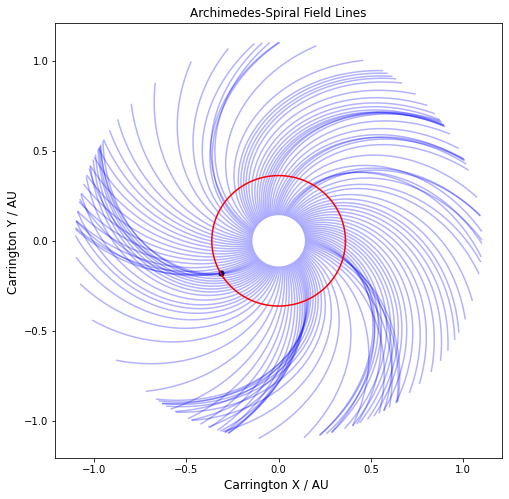

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,8), sharex=True)

jj = 0
for ii in p:
    phi_shift_vec = (ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))

    
    x = np.cos(phi_shift_vec)* (r[1:].to(u.AU))
    y = np.sin(phi_shift_vec)* (r[1:].to(u.AU))
    
    
    ax.plot(x, y, c="b", alpha=0.3)
    jj+=1

r_meet= (r_min_intersection*u.km).to(u.AU)
x_meet = np.cos(phi_meet_intersection)*r_meet
y_meet = np.sin(phi_meet_intersection)*r_meet
    
ax.scatter(x_meet, y_meet, s=25, c="k")

r_vec = np.ones(129)*r_meet
ax.plot(np.cos(np.append(p, 0))*r_vec,  np.sin(np.append(p, 0))*r_vec, c="r")

ax.set_xlabel("Carrington X / AU ", fontsize=fs1)
ax.set_ylabel("Carrington Y / AU ", fontsize=fs1)
ax.set_title("Archimedes-Spiral Field Lines", fontsize=fs1)
plt.savefig('figures/analysis/intersecting_characteristics_polar.png')

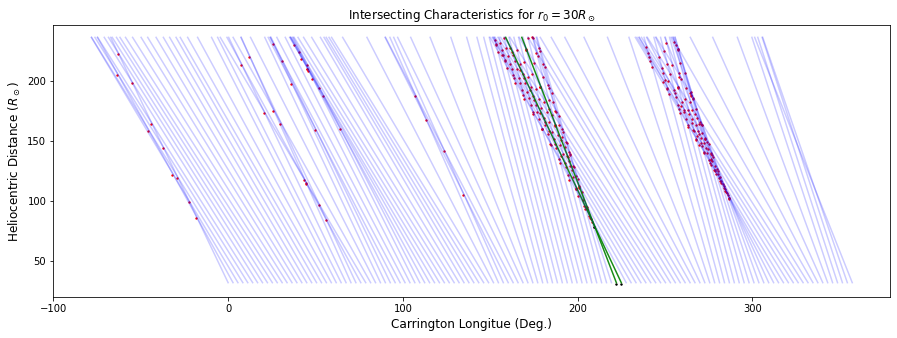

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,5), sharex=True)

jj = 0
for ii in p:
    if ii == phi0 or ii == phi1:
            ax.plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:]/(695700), c="g", alpha=0.9)
    else:
        ax.plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
                , r[1:]/(695700), c="b", alpha=0.2)
    jj+=1
    
ax.scatter(np.array(phi_meet_vec)*(180/np.pi), r_meet_vec, s=2, c="r", alpha=0.9)

ax.scatter(phi0*(180/np.pi), r[0].to(u.solRad), s=2, c="k")
ax.scatter(phi1*(180/np.pi), r[0].to(u.solRad), s=2, c="k")
ax.scatter(phi_meet_intersection*(180/np.pi), (r_min_intersection * u.km).to(u.solRad), s=2, c="k")

ax.set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
ax.set_ylabel("Heliocentric Distance $ (R_\odot$)", fontsize=fs1)
ax.set_title("Intersecting Characteristics for $r_{0} = 30 R_\odot$", fontsize=fs1)
plt.savefig('figures/analysis/intersecting_characteristics_alpha.png')

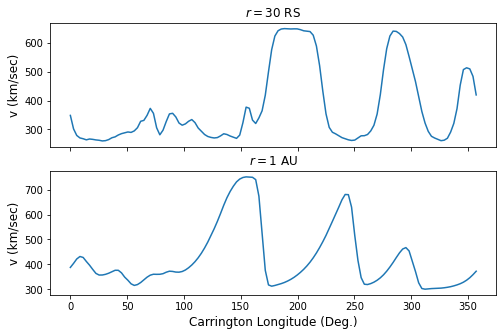

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (8,5), sharex=True)
# initial conditon
_ = ax[0].plot(p*(180/np.pi), v_at_30_radii_equator)
_ = ax[0].set_ylabel("v (km/sec)", fontsize=fs1)
_ = ax[0].set_title("$r = 30$ RS", fontsize=fs1)

# near-earth propagated wave
_ = ax[1].plot(p*(180/np.pi), v_at_1_au_equator)
_ = ax[1].set_xlabel("Carrington Longitude (Deg.)", fontsize=fs1)
_ = ax[1].set_ylabel("v (km/sec)", fontsize=fs1)
_ = ax[1].set_title("$r = 1$ AU", fontsize=fs1)

Text(0.5, 1.0, 'Intersecting Characteristics for $r_{0} = 1$ AU')

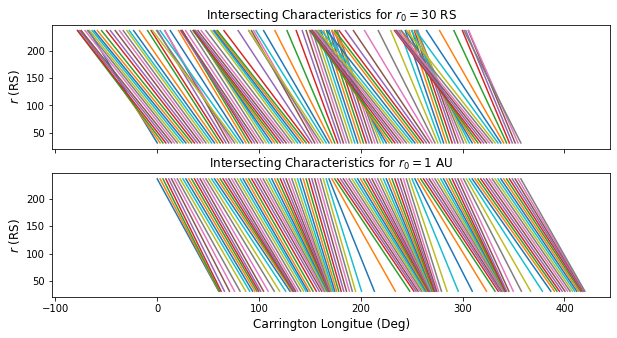

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,5), sharex=True)

jj = 0
for ii in p:
    ax[0].plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:]/(695700))
    jj+=1

ax[0].set_ylabel("$r$ (RS)", fontsize=fs1)
ax[0].set_title("Intersecting Characteristics for $r_{0} = 30$ RS", fontsize=fs1)



jj = 0
for ii in p:
    ax[1].plot((ii - omega_rot*(-dr.value)/(v_at_1_au_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:][::-1]/(695700))
    jj+=1
    
ax[1].set_xlabel("Carrington Longitue (Deg)", fontsize=fs1)
ax[1].set_ylabel("$r$ (RS)", fontsize=fs1)
ax[1].set_title("Intersecting Characteristics for $r_{0} = 1$ AU", fontsize=fs1)

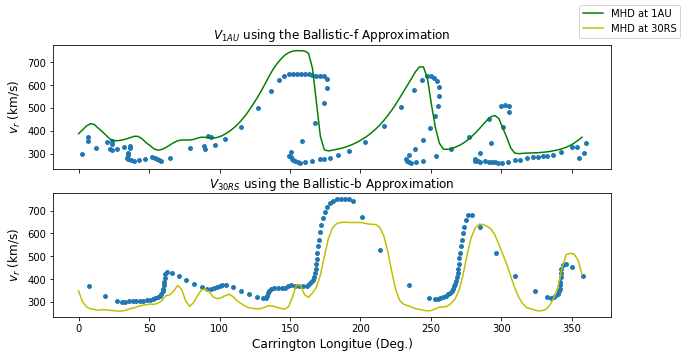

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,5), sharex=True)

phi_shift = -omega_rot*(-r[0].value +r[-1].value)/v_at_30_radii_equator
_ = ax[0].scatter(((p + phi_shift) %(2*np.pi))*(180/np.pi), v_at_30_radii_equator, s=15)
_ = ax[0].plot(p*(180/np.pi), v_at_1_au_equator, c="g", label="MHD at 1AU")
_ = ax[0].set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
_ = ax[0].set_title("$V_{1AU}$ using the Ballistic-f Approximation", fontsize=fs1)


phi_shift = -omega_rot*(-r[-1].value + r[0].value)/v_at_1_au_equator
_ = ax[1].scatter(((p + phi_shift) %(2*np.pi))*(180/np.pi), v_at_1_au_equator, s=15)
_ = ax[1].plot(p*(180/np.pi), v_at_30_radii_equator, c="y", label="MHD at 30RS")
_ = ax[1].set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
_ = ax[1].set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
_ = ax[1].set_title("$V_{30RS}$ using the Ballistic-b Approximation", fontsize=fs1)
_ = fig.legend()

One important remark is that if the initial velocity of the solar wind is an increasing function of Carrington longitude, then the velocity wave is guaranteed to **eventually** "break". Conversely, for backwards mapping, if there is a decreasing region in the initial velocity, then the characteristics will intersect. After the intersection, the classical solution no longer exists and instead the wave solution becomes a weak solution. Briefly, the weak solution allows the solution to be discontinuous in spite of the fact that at discontinuities the solution is not differentiable. A valid question would be then to ask if we can formalize when do the characteristic lines first intersect? By doing so, we can find the exact location, $(\tilde \phi, \tilde r)$, where beyond this point the ballistic approximation is no longer valid. 

* **Proposition** If the initial propagation velocity of the solar wind is an increasing function of ($\phi$), then the velocity wave eventually "breaks" and becomes a multi-valued solution. 

* **Proof** Suppose that that $\phi_{1}$, $\phi_{2}$ are two points in Carrignton longitude ($\phi \in [0, 2\pi]$), where $\phi_{1} < \phi_{2}$ and $v_{\phi_{1}} < v_{\phi_{2}}$ where obviously $(v_{\phi_{2}}, v_{\phi_{2}} >0)$. Then, $$\frac{\Omega_{rot}}{v_{\phi_{1}}} > \frac{\Omega_{rot}}{v_{\phi_{2}}}$$ leading to $$-\frac{\Omega_{rot}}{v_{\phi_{1}}} <-\frac{\Omega_{rot}}{v_{\phi_{2}}}$$ where $\Omega_{rot}$ is the angular frequency of the Sun's rotation, equal to $\frac{2 \pi}{25.38} \text{ 1/ days}$ at the solar equator.  
Therefore, the characteristic emanating from $(\phi_{1}, r_{0})$ and $(\phi_{2}, r_{0})$ will intersect at some point $(\tilde \phi, \tilde r)$. After the intersection, the propogated wave becomes multivalued and "breaks".

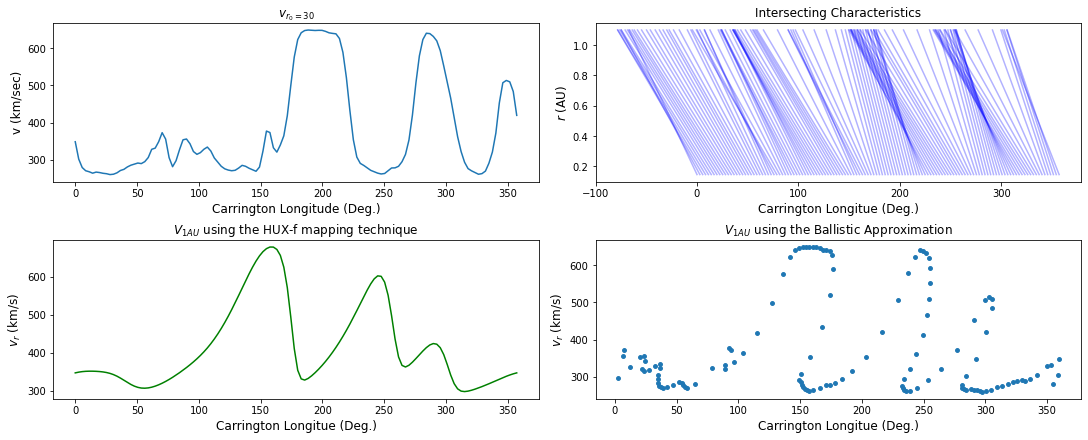

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize=(15, 6))
ax[0][0].plot(p*(180/np.pi), v_at_30_radii_equator)
ax[0][0].set_xlabel("Carrington Longitude (Deg.)", fontsize=fs1)
ax[0][0].set_ylabel("v (km/sec)", fontsize=fs1)
ax[0][0].set_title("$v_{r_{0}=30}$", fontsize=fs1)


jj = 0
for ii in p:
    ax[0][1].plot((ii - omega_rot*(dr.value)/(v_at_30_radii_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:]/(695700*215.032), c="b", alpha=0.3)
    jj+=1
ax[0][1].set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
ax[0][1].set_ylabel("$r$ (AU)", fontsize=fs1)
ax[0][1].set_title("Intersecting Characteristics", fontsize=fs1)

phi_shift = apply_ballistic_approximation(np.array(v_at_30_radii_equator), 
                r[-1].value - r[0].value, p)*180/np.pi
ax[1][1].scatter(phi_shift, v_at_30_radii_equator, s=15)
ax[1][1].set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
ax[1][1].set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
ax[1][1].set_title("$V_{1AU}$ using the Ballistic Approximation", fontsize=fs1)


ax[1][0].plot(p*180/np.pi, apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1]),
            'g',label="HUX-f Technique")

ax[1][0].set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
ax[1][0].set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
ax[1][0].set_title("$V_{1AU}$ using the HUX-f mapping technique", fontsize=fs1)
plt.savefig('figures/analysis/multivalued_result.png')

Text(0.5, 1.0, '$V_{30RS}$ using the HUX-b mapping technique')

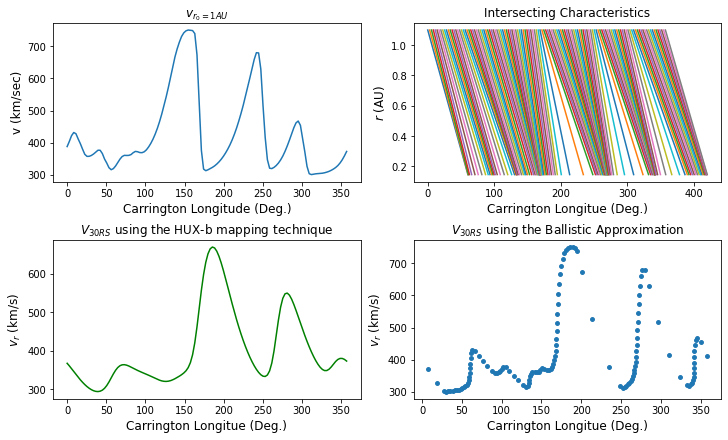

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize=(10, 6))
ax[0][0].plot(p*(180/np.pi), v_at_1_au_equator)
ax[0][0].set_xlabel("Carrington Longitude (Deg.)", fontsize=fs1)
ax[0][0].set_ylabel("v (km/sec)", fontsize=fs1)
ax[0][0].set_title("$v_{r_{0}=1AU}$", fontsize=fs1)


jj = 0
for ii in p:
    ax[0][1].plot((ii - omega_rot*(-dr.value)/(v_at_1_au_equator[jj])*np.arange(r[1:].shape[0]))*(180/np.pi)
            , r[1:][::-1]/(695700*215.032))
    jj+=1
ax[0][1].set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
ax[0][1].set_ylabel("$r$ (AU)", fontsize=fs1)
ax[0][1].set_title("Intersecting Characteristics", fontsize=fs1)


phi_shift = apply_ballistic_approximation(np.array(v_at_1_au_equator), 
                -r[-1].value + r[0].value, p)*180/np.pi
ax[1][1].scatter(phi_shift, v_at_1_au_equator, s=15)
ax[1][1].set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
ax[1][1].set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
ax[1][1].set_title("$V_{30RS}$ using the Ballistic Approximation", fontsize=fs1)


ax[1][0].plot(p*180/np.pi, apply_backwards_upwind_model(v_at_1_au_equator, dr.value, p[1:] -p[:-1]),
            'g',label="HUX-f Technique")

ax[1][0].set_xlabel("Carrington Longitue (Deg.)", fontsize=fs1)
ax[1][0].set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
ax[1][0].set_title("$V_{30RS}$ using the HUX-b mapping technique", fontsize=fs1)

#### When can we use the method of characteristics to approximate $v_{r}$?
For a small enough $\Delta r$, a solution can be constructed by following the characteristic lines. As long as the characteristic lines do not cross, we can approximate the solution using such assumtion. 

# Finite Volume Methods 

When evaluating different numerical schemes it is important that the methodologies:
    
    1. Are at least second order accurate on smooth solutions. 
    2. HIgh accuracy at discontinuities. 
    3. Absence of artifical oscillations.
   

# $1^{st}$ order upwind methods 

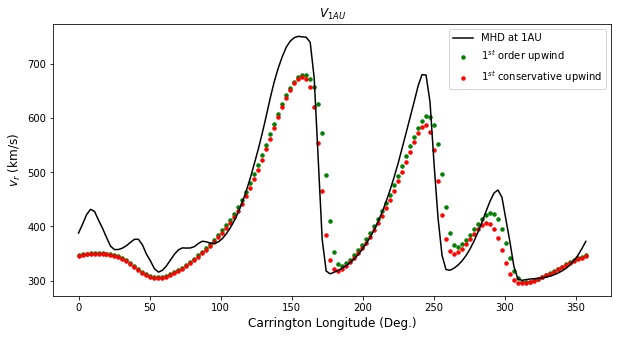

In [45]:
fig, ax = plt.subplots( figsize = (10,5), sharex=True)


_ = ax.scatter(p*180/np.pi, apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1]),
             c="g", s=12,  label="$1^{st}$ order upwind")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                                   numerical_method = "conservative_upwind")[-1, :],
                                                    c="r", s=12,  label="$1^{st}$ conservative upwind")



_ = ax.plot(p*(180/np.pi), v_at_1_au_equator, c="k", label="MHD at 1AU")
_ = ax.set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
_ = ax.set_xlabel("Carrington Longitude (Deg.)", fontsize=fs1)
_ = ax.set_title("$V_{1AU}$", fontsize=fs1)
_ = plt.legend()
plt.savefig('figures/analysis/comparison_of_schemes_first_order.png')

# $2^{nd}$ order accurate methods (Higher order methods)

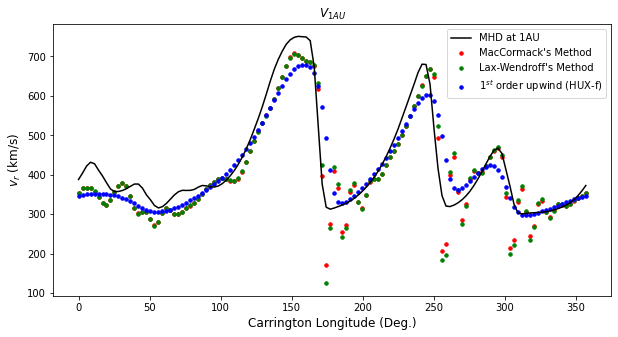

In [46]:
fig, ax = plt.subplots( figsize = (10,5), sharex=True)


_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
            numerical_method="maccormack")[-1, :],
             c="r", s=12, label="MacCormack's Method")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
            numerical_method="lax_wendroff")[-1, :],
             c="g", s=12, label="Lax-Wendroff's Method")

_ = ax.scatter(p*180/np.pi, apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1]),
             c="b", s=12,  label="$1^{st}$ order upwind (HUX-f)")


_ = ax.plot(p*(180/np.pi), v_at_1_au_equator, c="k", label="MHD at 1AU")
_ = ax.set_ylabel("$v_{r}$ (km/s)", fontsize=fs1)
_ = ax.set_xlabel("Carrington Longitude (Deg.)", fontsize=fs1)
_ = ax.set_title("$V_{1AU}$", fontsize=fs1)
_ = plt.legend()
plt.savefig('figures/analysis/comparison_of_schemes_higher_order_and_upwind.png')

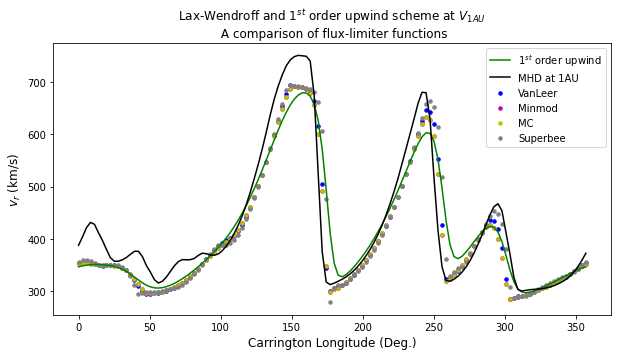

In [47]:
fig, ax = plt.subplots( figsize = (10,5), sharex=True)

_ = ax.plot(p*180/np.pi, apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1]),
             c="g", label="$1^{st}$ order upwind")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="vanleer")[-1, :],
             c="b", s=12, label="VanLeer")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="minmod")[-1, :],
             c="m", s=12, label="Minmod")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="minmod")[-1, :],
             c="y", s=12, label="MC")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="superbee")[-1, :],
             c="grey", s=12, label="Superbee")

_ = ax.plot(p*(180/np.pi), v_at_1_au_equator, c="k", label="MHD at 1AU")
_ = ax.set_ylabel("$v_{r}$ (km/s) ", fontsize=fs1)
_ = ax.set_xlabel("Carrington Longitude (Deg.)", fontsize=fs1)
_ = ax.set_title("Lax-Wendroff and $1^{st}$ order upwind scheme at $V_{1AU}$ \n A comparison of flux-limiter functions", fontsize=fs1)
_ = plt.legend()
plt.savefig('figures/analysis/comparison_for_lax_wendroff_and_upwind.png')

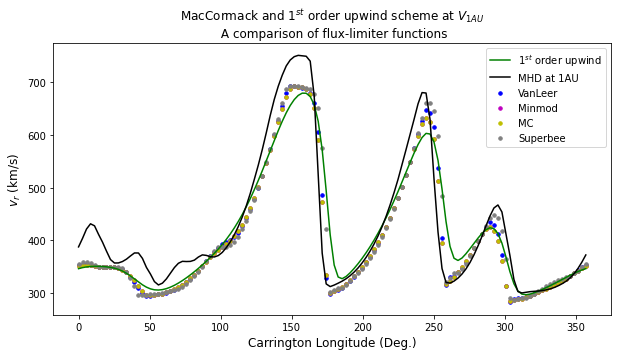

In [48]:
fig, ax = plt.subplots( figsize = (10,5), sharex=True)

_ = ax.plot(p*180/np.pi, apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1]),
             c="g", label="$1^{st}$ order upwind")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="vanleer")[-1, :],
             c="b", s=12, label="VanLeer")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="minmod")[-1, :],
             c="m", s=12, label="Minmod")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="minmod")[-1, :],
             c="y", s=12, label="MC")

_ = ax.scatter(p*180/np.pi, apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="superbee")[-1, :],
             c="grey", s=12, label="Superbee")

_ = ax.plot(p*(180/np.pi), v_at_1_au_equator, c="k", label="MHD at 1AU")
_ = ax.set_ylabel("$v_{r}$ (km/s) ", fontsize=fs1)
_ = ax.set_xlabel("Carrington Longitude (Deg.)", fontsize=fs1)
_ = ax.set_title("MacCormack and $1^{st}$ order upwind scheme at $V_{1AU}$ \n A comparison of flux-limiter functions", fontsize=fs1)
_ = plt.legend()
plt.savefig('figures/analysis/comparison_for_maccormack_and_upwind.png')

In [49]:
# 1st order upwind scheme quasi-linear form
hux_f_solution = apply_forward_upwind_model(v_at_30_radii_equator, dr.value, p[1:] -p[:-1])

# 1st order conservative upwind 
conservative_upwind_solution = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="conservative_upwind")[-1, :]

# maccormack method
maccormack_solution = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="maccormack")[-1, :]

# maccormack and 1st order conservative upwind with superbee limiter. 
superbee_maccormack = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="superbee")[-1, :]

# van leer maccormack and 1st order conservative upwind
van_leer_maccormack = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="vanleer")[-1, :]


# MC maccormack and 1st order conservative upwind
mc_maccormack = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="mc")[-1, :]

# minmod maccormack and 1st order conservative upwind
minmod_maccormack = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_maccormack", flux_function="minmod")[-1, :]

# superbee lax-wendroff and 1st order conservative upwind
superbee_wendroff = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="superbee")[-1, :]

# van leer lax-wendroff and 1st order conservative upwind
van_leer_wendroff = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="vanleer")[-1, :]

# mc lax-wendroff and 1st order conservative upwind
mc_wendroff = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="mc")[-1, :]

# minmod lax-wendroff and 1st order conservative upwind
minmod_wendroff = apply_numerical_method(v_at_30_radii_equator, dr.value, p[1:] -p[:-1], 
                                        numerical_method="upwind_first_lax_wendroff", flux_function="minmod")[-1, :]

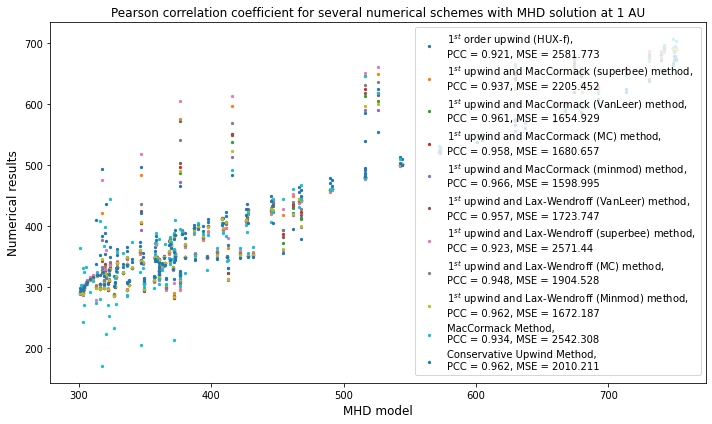

In [50]:
fig, ax = plt.subplots(figsize = (10,6))

size = 5
ax.scatter(v_at_1_au_equator, hux_f_solution, s=size, label="$1^{st}$ order upwind (HUX-f), \nPCC = " +\
           str(round(stats.pearsonr(hux_f_solution, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - hux_f_solution)**2), 3)))

ax.scatter(v_at_1_au_equator, superbee_maccormack, s=size,  label="$1^{st}$ upwind and MacCormack (superbee) method, \nPCC = " \
           + str(round(stats.pearsonr(superbee_maccormack, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - superbee_maccormack)**2), 3)))

ax.scatter(v_at_1_au_equator, van_leer_maccormack, s=size,  label="$1^{st}$ upwind and MacCormack (VanLeer) method, \nPCC = " \
           + str(round(stats.pearsonr(van_leer_maccormack, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - van_leer_maccormack)**2), 3)))

ax.scatter(v_at_1_au_equator, mc_maccormack, s=size,  label="$1^{st}$ upwind and MacCormack (MC) method, \nPCC = " \
           + str(round(stats.pearsonr(mc_maccormack, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - mc_maccormack)**2), 3)))

ax.scatter(v_at_1_au_equator, minmod_maccormack, s=size,  label="$1^{st}$ upwind and MacCormack (minmod) method, \nPCC = " \
           + str(round(stats.pearsonr(minmod_maccormack, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - minmod_maccormack)**2), 3)))

ax.scatter(v_at_1_au_equator, van_leer_wendroff, s=size,  label="$1^{st}$ upwind and Lax-Wendroff (VanLeer) method, \nPCC = " \
           + str(round(stats.pearsonr(van_leer_wendroff, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - van_leer_wendroff)**2), 3)))

ax.scatter(v_at_1_au_equator, superbee_wendroff, s=size,  label="$1^{st}$ upwind and Lax-Wendroff (superbee) method, \nPCC = " \
           + str(round(stats.pearsonr(superbee_wendroff, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - superbee_wendroff)**2), 3)))

ax.scatter(v_at_1_au_equator, mc_wendroff, s=size,  label="$1^{st}$ upwind and Lax-Wendroff (MC) method, \nPCC = " \
           + str(round(stats.pearsonr(mc_wendroff, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - mc_wendroff)**2), 3)))

ax.scatter(v_at_1_au_equator, minmod_wendroff, s=size,  label="$1^{st}$ upwind and Lax-Wendroff (Minmod) method, \nPCC = " \
           + str(round(stats.pearsonr(minmod_wendroff, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - minmod_wendroff)**2), 3)))

ax.scatter(v_at_1_au_equator, maccormack_solution, s=size, label = "MacCormack Method, \nPCC = " +\
           str(round(stats.pearsonr(maccormack_solution, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - maccormack_solution)**2), 3)))

ax.scatter(v_at_1_au_equator, conservative_upwind_solution, s=size, label="Conservative Upwind Method, \nPCC = " + \
        str(round(stats.pearsonr(conservative_upwind_solution, v_at_1_au_equator)[0], 3))
           + ", MSE = " + str(round(np.mean((v_at_1_au_equator - conservative_upwind_solution)**2), 3)))



ax.set_xlabel("MHD model", fontsize=fs1)
ax.set_ylabel("Numerical results", fontsize=fs1)
ax.set_title("Pearson correlation coefficient for several numerical schemes with MHD solution at 1 AU", fontsize=fs1)
plt.legend()
plt.tight_layout()
plt.savefig('figures/analysis/pearson_CC_hux.png')